In [8]:
import cv2
import numpy as np
#Load YOLO
net = cv2.dnn.readNet("/content/drive/MyDrive/yolov3.weights","/content/drive/MyDrive/yolov3.cfg.txt")
classes = []
with open("/content/drive/MyDrive/coco.names.txt","r") as f:
    classes = [line.strip() for line in f.readlines()]

In [9]:
! wget "https://pjreddie.com/media/files/yolov3.weights"

--2021-12-23 08:00:32--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  40.5MB/s    in 6.3s    

2021-12-23 08:00:39 (37.8 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



In [10]:
net.getUnconnectedOutLayers()

array([[200],
       [227],
       [254]], dtype=int32)

In [11]:
layer_names = net.getLayerNames()
outputlayers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [12]:
outputlayers

['yolo_82', 'yolo_94', 'yolo_106']

In [13]:
colors= np.random.uniform(0,255,size=(len(classes),3))

In [15]:
#loading image
img = cv2.imread("/content/drive/MyDrive/demo1.jpg")
img = cv2.resize(img,None,fx=0.4,fy=0.3)
height,width,channels = img.shape


Shape of the image:(677, 1024, 3)


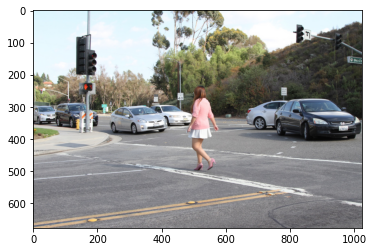

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
# To know the shape of images
def image_and_shapes(image):
    img= plt.imread(image)
    plt.imshow(img)
    print("Shape of the image:{}".format(img.shape))

image_and_shapes("/content/drive/MyDrive/demo1.jpg")

In [18]:
#detecting objects
blob = cv2.dnn.blobFromImage(img,0.00392,(416,416),(0,0,0),True,crop=False)

In [19]:
net.setInput(blob)
outs = net.forward(outputlayers)

In [20]:
#Showing info on screen/ get confidence score of algorithm in detecting an object in blob
class_ids=[]
confidences=[]
boxes=[]
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        
        
        if confidence > 0.5:
            #onject detected
            center_x= int(detection[0]*width)
            center_y= int(detection[1]*height)
            w = int(detection[2]*width)
            h = int(detection[3]*height)
        
            #cv2.circle(img,(center_x,center_y),10,(0,255,0),2)
            #rectangle co-ordinaters
            x=int(center_x - w/2)
            y=int(center_y - h/2)
            #cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
            
            boxes.append([x,y,w,h]) #put all rectangle areas
            confidences.append(float(confidence)) #how confidence was that object detected and show that percentage
            class_ids.append(class_id) #name of the object tha was detected

In [21]:
confidences

[0.9978955388069153,
 0.8571187853813171,
 0.5657181143760681,
 0.8571400046348572,
 0.9945201277732849,
 0.9958531260490417,
 0.9988687038421631,
 0.9988481998443604,
 0.9605525732040405,
 0.6634318232536316,
 0.8187410831451416,
 0.5150426626205444,
 0.9373762011528015]

In [22]:
class_ids

[2, 9, 2, 2, 2, 2, 2, 0, 9, 9, 9, 9, 2]

In [23]:
#cv2.dnn.NMSBoxes(boxes,confidences,score_threshold,IOU_threshold)
indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.4,0.6)#Non Max Suppressions

'''Now using below loop over all found boxes, 
if box is appearing in indexes then only draw rectangle, color it,
put text of class name on it.'''
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
        cv2.putText(img,label,(x,y+30),font,1,(255,255,255),2)
            


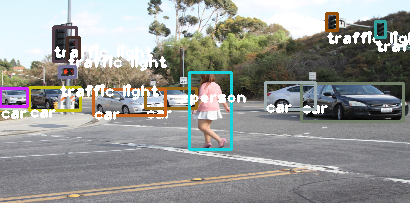

In [24]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)
